In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


# Credits and Links

* UDEMY - Machine Learning A-Z <sup>TM</sup>*

<a id="index"></a>
# Table of Content

1. [Importing Libraries](#1)
2. [Importing Dataset](#2)
3. [Splitting the dataset into Train/Test](#3)
4. [Feature Scaling](#4)
5. [Naive Bayes Classifier](#5)
6. [Prediction](#6)
    - [New Result](#6.1)
    - [Test Result](#6.2)
7. [Confusion Matrix](#7)
6. [Visualization](#8)
    - [Training set results](#8.1)
    - [Test set results](#8.2)

<a id="1"></a>
# 1. Importing Libraries

[Go back to Index](#index)

In [2]:
#1. General
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#2. Data Preprocessing
##2.1 Fill Missing Data
from sklearn.impute import SimpleImputer

##2.2 Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

##2.3 Splitting Train and Test
from sklearn.model_selection import train_test_split

##2.4 Feature Scaling
from sklearn.preprocessing import StandardScaler

#3. Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#4. Scikit Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

<a id="2"></a>
# 2. Importing Dataset

[Go back to Index](#index)

In [3]:
# Dataset:= Combined Cycle Powerplant.csv
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<a id="3"></a>
# 3. Splitting the dataset into Train/Test

[Go back to Index](#index)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<a id="4"></a>
# 4. Feature Scaling

[Go back to Index](#index)

In [5]:
sc = StandardScaler()

In [6]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="5"></a>
# 5. Naive Bayes Classifier - Gaussian 

[Go back to Index](#index)

In [7]:
#linear classifier
classifier = GaussianNB()

In [8]:
classifier.fit(X_train, y_train)

GaussianNB()

<a id="6"></a>
# 6. Prediction

[Go back to Index](#index)

<a id="6.1"></a>
## 6.1 Predicting a new value

[Go back to Index](#index)

In [9]:
#Remember to put 2D array as input
#[[Age, Salary]] -> 1 or 0 output
#classifier.predict([[30, 87000]]) -> Feature scaling is missing -> wrong output !
classifier.predict(sc.transform([[30, 87000]]))

array([0])

<a id="6.2"></a>
## 6.2 Predicting X_test

[Go back to Index](#index)

In [10]:
y_pred = classifier.predict(X_test) #X_test has already undergone feature scaling
_y_pred = y_pred.reshape(len(y_pred),1) #Convert 1D -> 2D
_y_test = y_test.reshape(len(y_test),1) #Convert 1D -> 2D
print(np.concatenate((_y_pred, _y_test),1)) #Side by side depiciton of predicted vs actual results expected

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


<a id="7"></a>
# 7. Confusion Matrix

[Go back to Index](#index)

<a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">Confusion Matrix Explained</a>

<a href="https://datascience.stackexchange.com/questions/28426/train-accuracy-vs-test-accuracy-vs-confusion-matrix">confusion matrix vs accuracy_score</a>

In [11]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 7, 25]])

### Note

* TP:= 65 correct predictions of class (1)
* FP:= 3 incorrect predictions of class (0)
* FP:= 7 incorrect predictions of class (1)
* TN:= 25 correct predictions of class (0)

* TP + TN = 90 = total accuracy

In [12]:
accuracy_score(y_test, y_pred)

0.9

<a id="8"></a>
# 8. Visualization

[Go back to Index](#index)

<a id="8.1"></a>
## 8.1 Training Results

[Go back to Index](#index)

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

In [14]:
y12_pred = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

/tmp/ipykernel_20/224499679.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


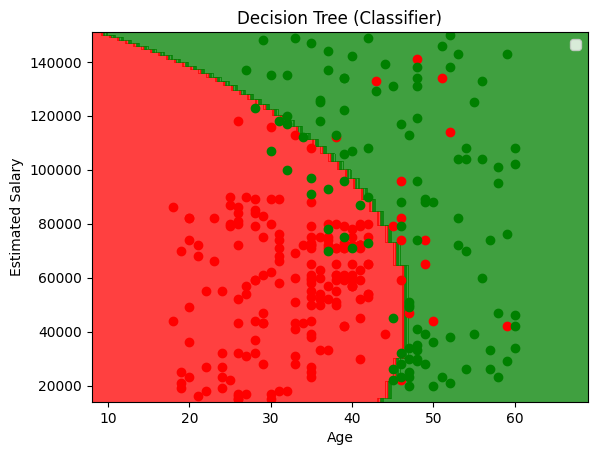

In [15]:
plt.title('Decision Tree (Classifier)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.contourf(X1, X2, y12_pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.show()

<a id="8.2"></a>
## 8.2 Test Results

[Go back to Index](#index)

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))

In [17]:
y12_pred = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

/tmp/ipykernel_20/621416509.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


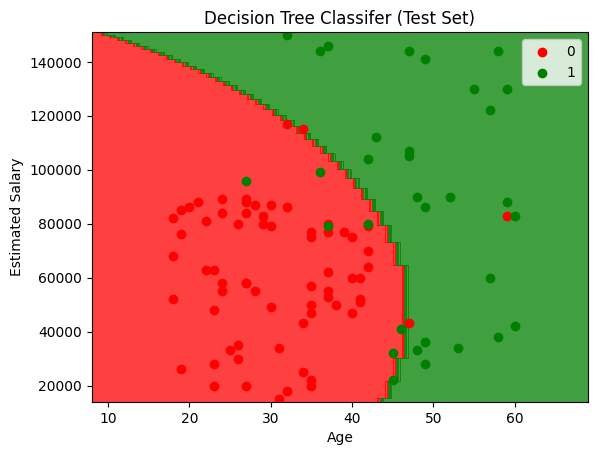

In [18]:
plt.contourf(X1, X2, y12_pred, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifer (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()